In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
show1=pd.read_csv('diabetes_prediction_dataset.csv')
show1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


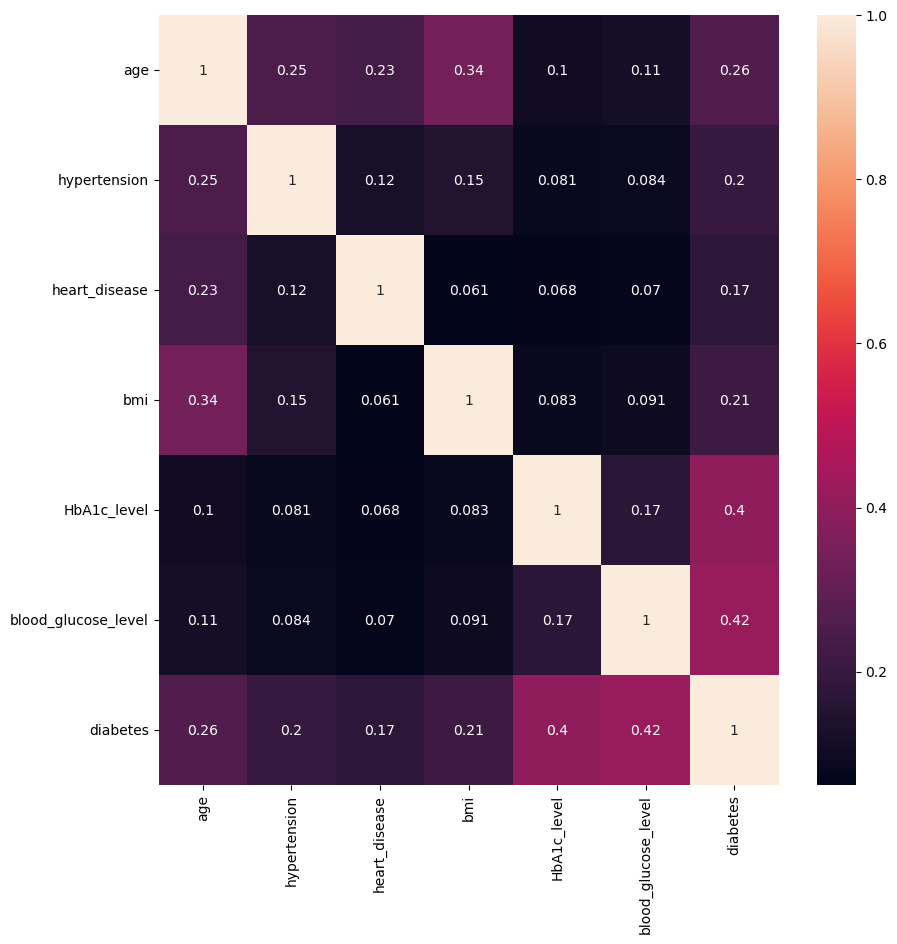

In [4]:
plt.figure(figsize = (10,10))
sns.heatmap(show1.corr(),annot=True)
plt.show()

In [5]:
show1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
 def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,gender,object,"[Female, Male, Other]",3,0
1,age,float64,"[80.0, 54.0, 28.0, 36.0, 76.0, 20.0, 44.0, 79....",102,0
2,hypertension,int64,"[0, 1]",2,0
3,heart_disease,int64,"[1, 0]",2,0
4,smoking_history,object,"[never, No Info, current, former, ever, not cu...",6,0
5,bmi,float64,"[25.19, 27.32, 23.45, 20.14, 19.31, 23.86, 33....",4247,0
6,HbA1c_level,float64,"[6.6, 5.7, 5.0, 4.8, 6.5, 6.1, 6.0, 5.8, 3.5, ...",18,0
7,blood_glucose_level,int64,"[140, 80, 158, 155, 85, 200, 145, 100, 130, 16...",18,0
8,diabetes,int64,"[0, 1]",2,0


# Gender

In [8]:
show1['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
show1['gender']=show1['gender'].str.strip()

<AxesSubplot:xlabel='gender', ylabel='count'>

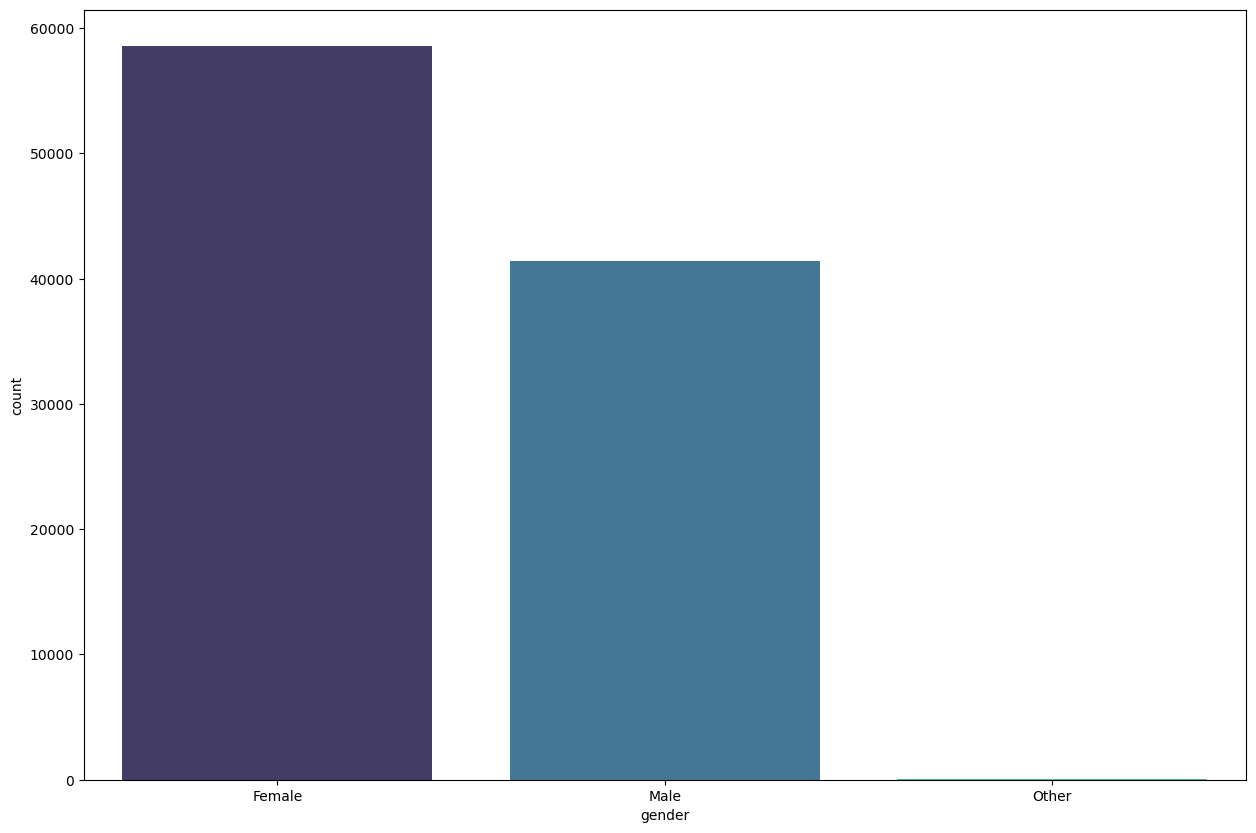

In [10]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'gender' ,data=show1,palette="mako")

# Age

In [11]:
show1['age'].unique() 

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [12]:
def check_Negative(col,show1):
    Neg=False  
    for i in range(len(show1)):
        value=show1.loc[i,col]
        if value<0:
            Neg=True
                  
    return Neg

In [13]:
def change_Negative(col,show1):
    
    for i in range(len(show1)):
        
        if show1.loc[i,col] <0:
            show1.loc[i,col]=0

In [14]:
def check_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    
    outliers = False
   
    for i in range(len(show1)):
        value=show1.loc[i,col]
        if value>upper_limit or value<lower_limit:
            #outliers.append(value)
            outliers=True
            
    return outliers

In [15]:
def handle_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    for i in range(len(show1)):
        
        if show1.loc[i,col]>upper_limit:
            show1.loc[i,col]=upper_limit
        elif show1.loc[i,col]<lower_limit:
            show1.loc[i,col]=lower_limit

In [16]:
check_outliers('age',show1)

False

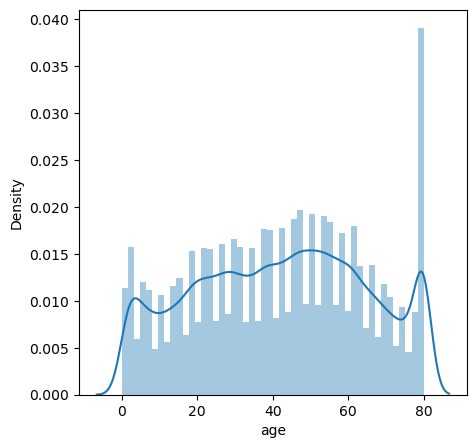

In [17]:
plt.figure(figsize = (5,5))
sns.distplot(show1['age'])
plt.show()

# Hypertension

In [18]:
show1['hypertension'].unique()

array([0, 1], dtype=int64)

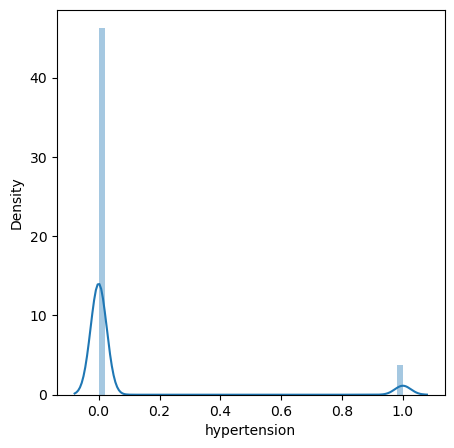

In [19]:
plt.figure(figsize = (5,5))
sns.distplot(show1['hypertension'])
plt.show()

# Heart_disease

In [20]:
show1['heart_disease'].unique()

array([1, 0], dtype=int64)

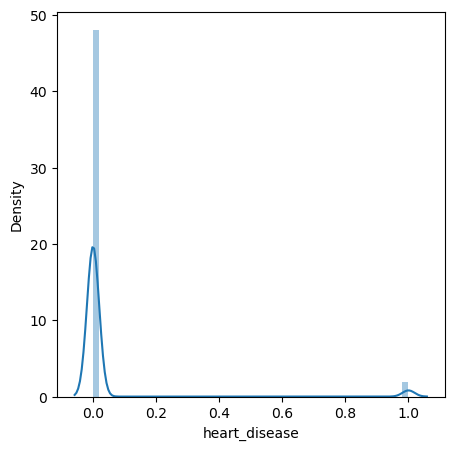

In [21]:
plt.figure(figsize = (5,5))
sns.distplot(show1['heart_disease'])
plt.show()

([<matplotlib.axis.XTick at 0x1fa4674b0a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

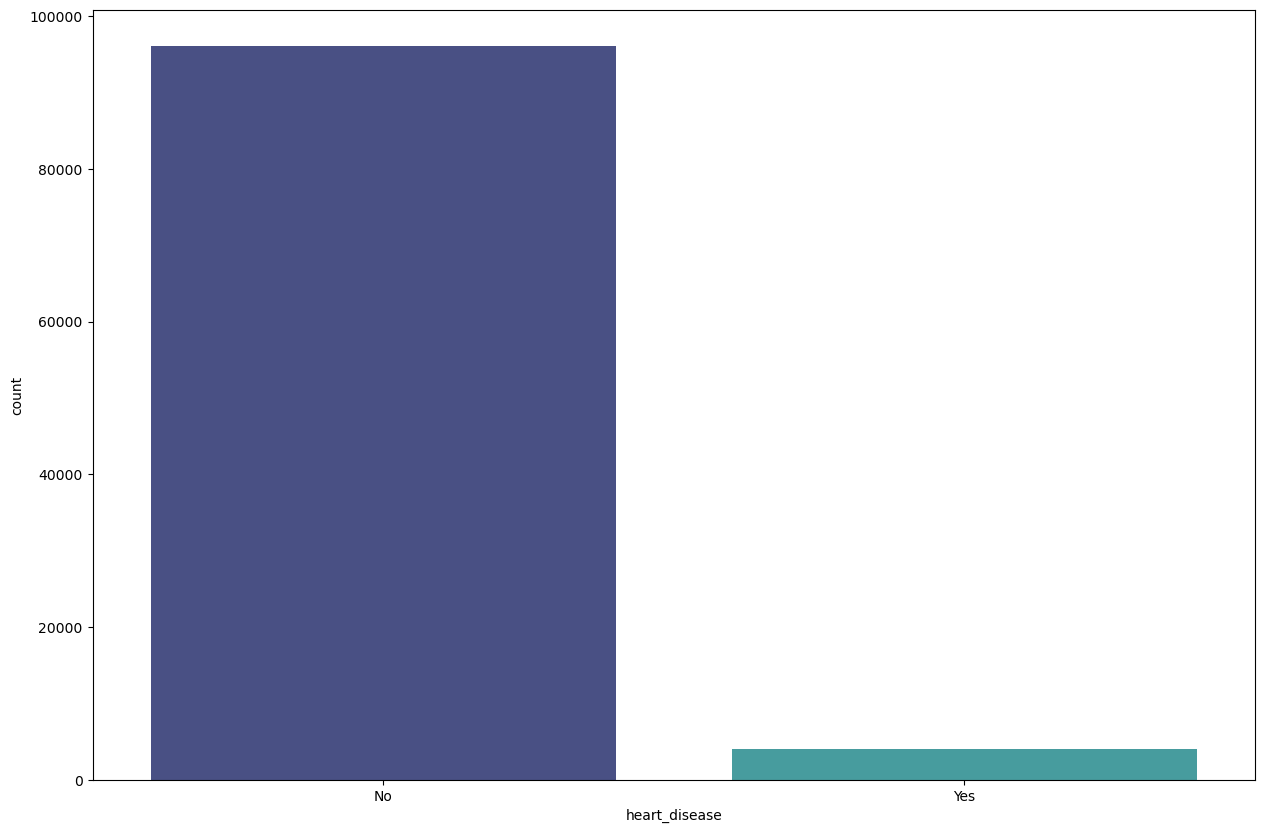

In [22]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'heart_disease' ,data=show1,palette="mako")
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])

# Smoking_history

In [23]:
show1['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [24]:
show1['smoking_history']=show1['smoking_history'].str.strip()

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

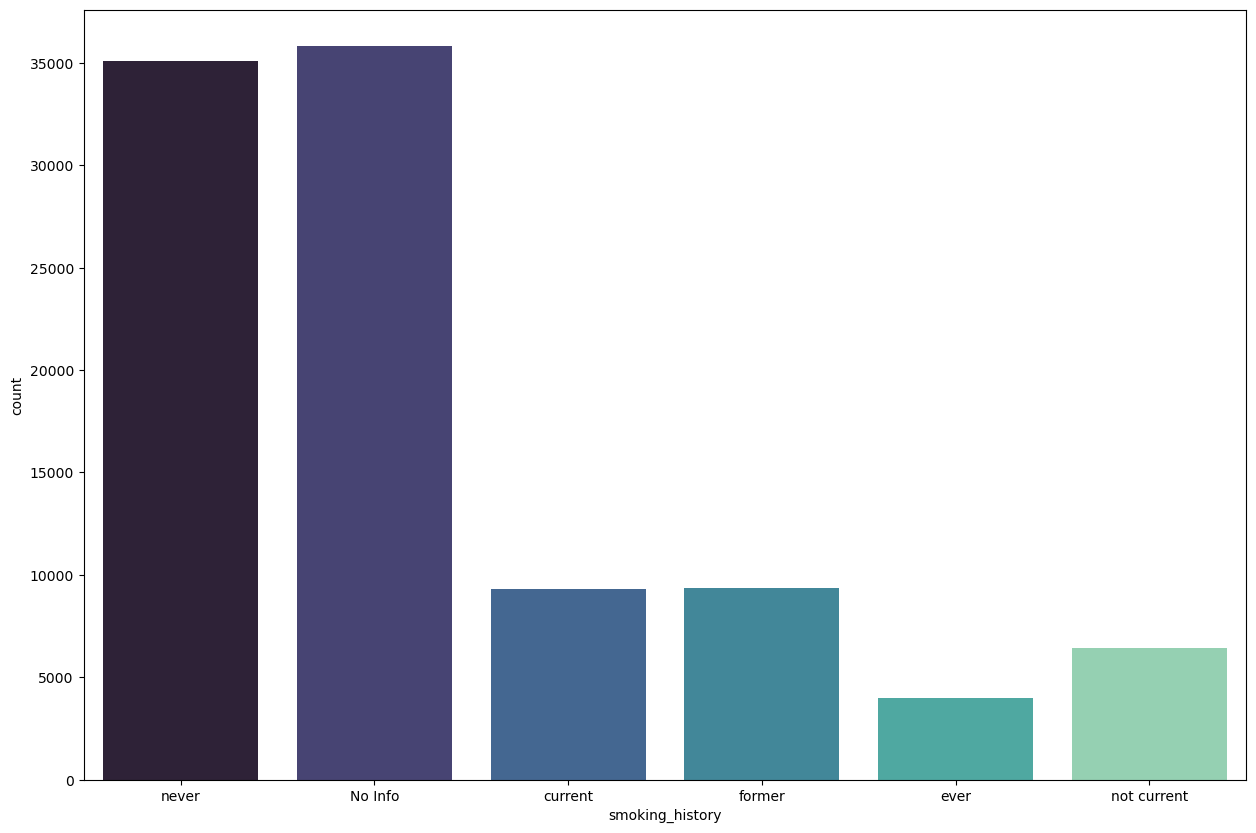

In [25]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'smoking_history' ,data=show1,palette="mako")

# BMI

In [26]:
show1['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

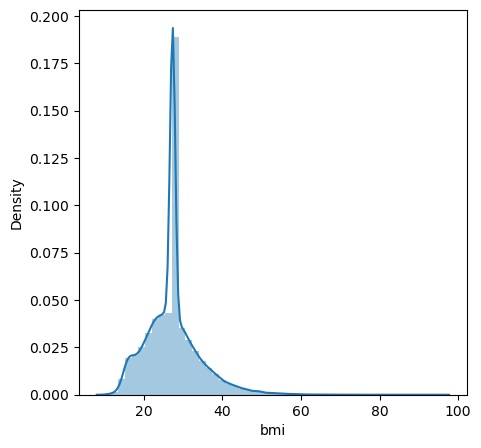

In [27]:
plt.figure(figsize = (5,5))
sns.distplot(show1['bmi'])
plt.show()

In [28]:
check_Negative('bmi',show1)

False

In [29]:
check_outliers('bmi',show1)

True

In [30]:
handle_outliers('bmi',show1)

In [31]:
check_outliers('bmi',show1)

False

# HbA1c_level

In [32]:
show1['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

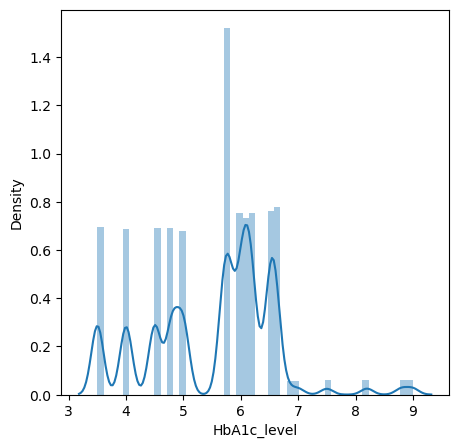

In [33]:
plt.figure(figsize = (5,5))
sns.distplot(show1['HbA1c_level'])
plt.show()

In [34]:
check_Negative('HbA1c_level',show1)

False

In [35]:
check_outliers('HbA1c_level',show1)

True

In [36]:
handle_outliers('HbA1c_level',show1)

In [37]:
check_outliers('HbA1c_level',show1)

False

# Blood_glucose_level

In [38]:
show1['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

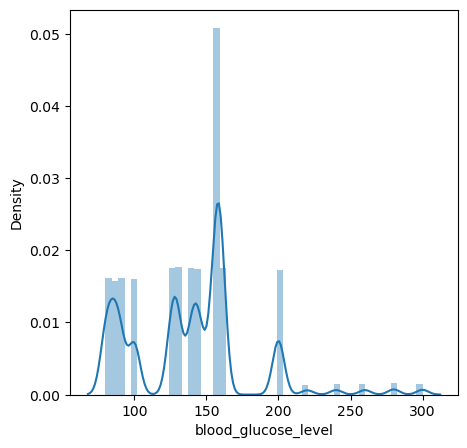

In [39]:
plt.figure(figsize = (5,5))
sns.distplot(show1['blood_glucose_level'])
plt.show()

In [40]:
check_Negative('blood_glucose_level',show1)

False

In [41]:
check_outliers('blood_glucose_level',show1)

True

In [42]:
handle_outliers('blood_glucose_level',show1)

In [43]:
check_outliers('blood_glucose_level',show1)

False

# Diabetes {Target}

In [44]:
show1['diabetes'].unique()

array([0, 1], dtype=int64)

([<matplotlib.axis.XTick at 0x1fa467033d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

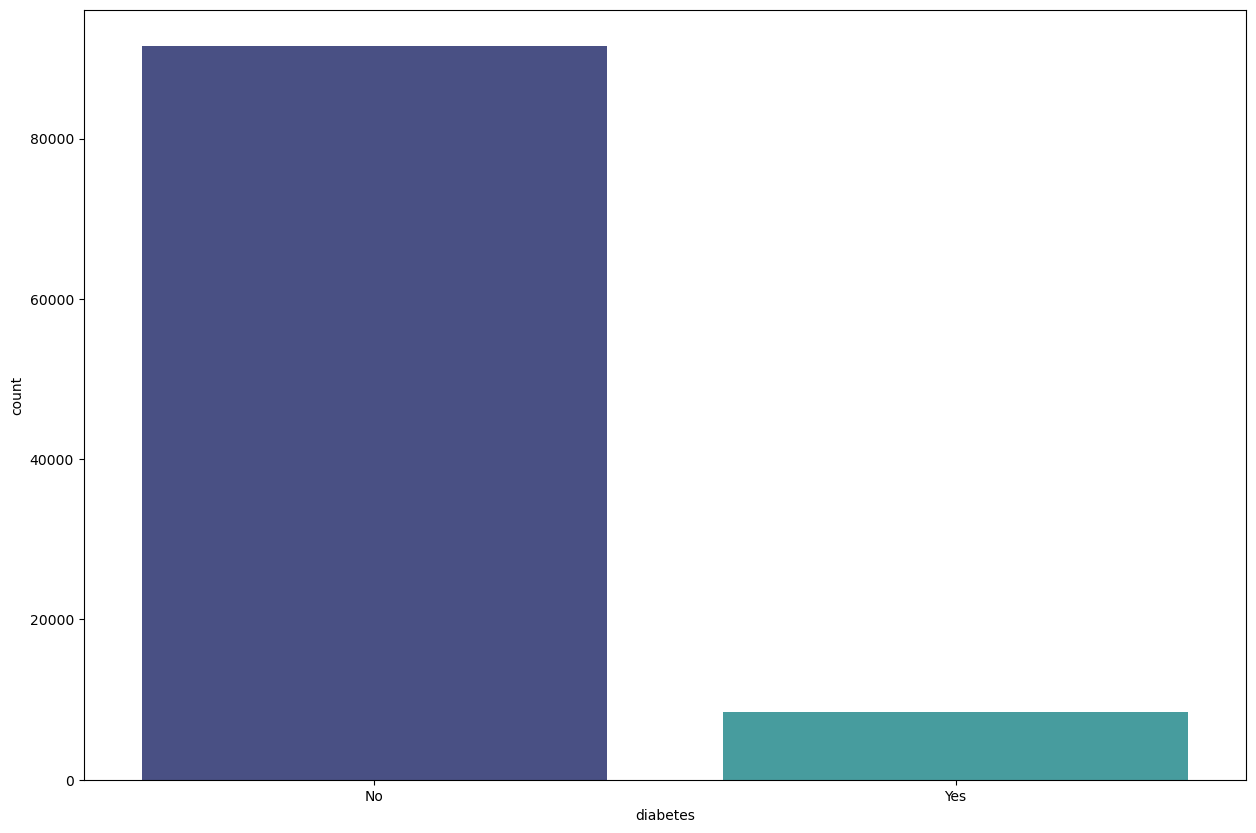

In [45]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'diabetes' ,data=show1,palette="mako")
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])

In [46]:
show1.duplicated().sum()

4091

In [47]:
show1.drop_duplicates(inplace=True)

In [48]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95909 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95909 non-null  object 
 1   age                  95909 non-null  float64
 2   hypertension         95909 non-null  int64  
 3   heart_disease        95909 non-null  int64  
 4   smoking_history      95909 non-null  object 
 5   bmi                  95909 non-null  float64
 6   HbA1c_level          95909 non-null  float64
 7   blood_glucose_level  95909 non-null  float64
 8   diabetes             95909 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.3+ MB


In [49]:
show1.duplicated().sum()

0

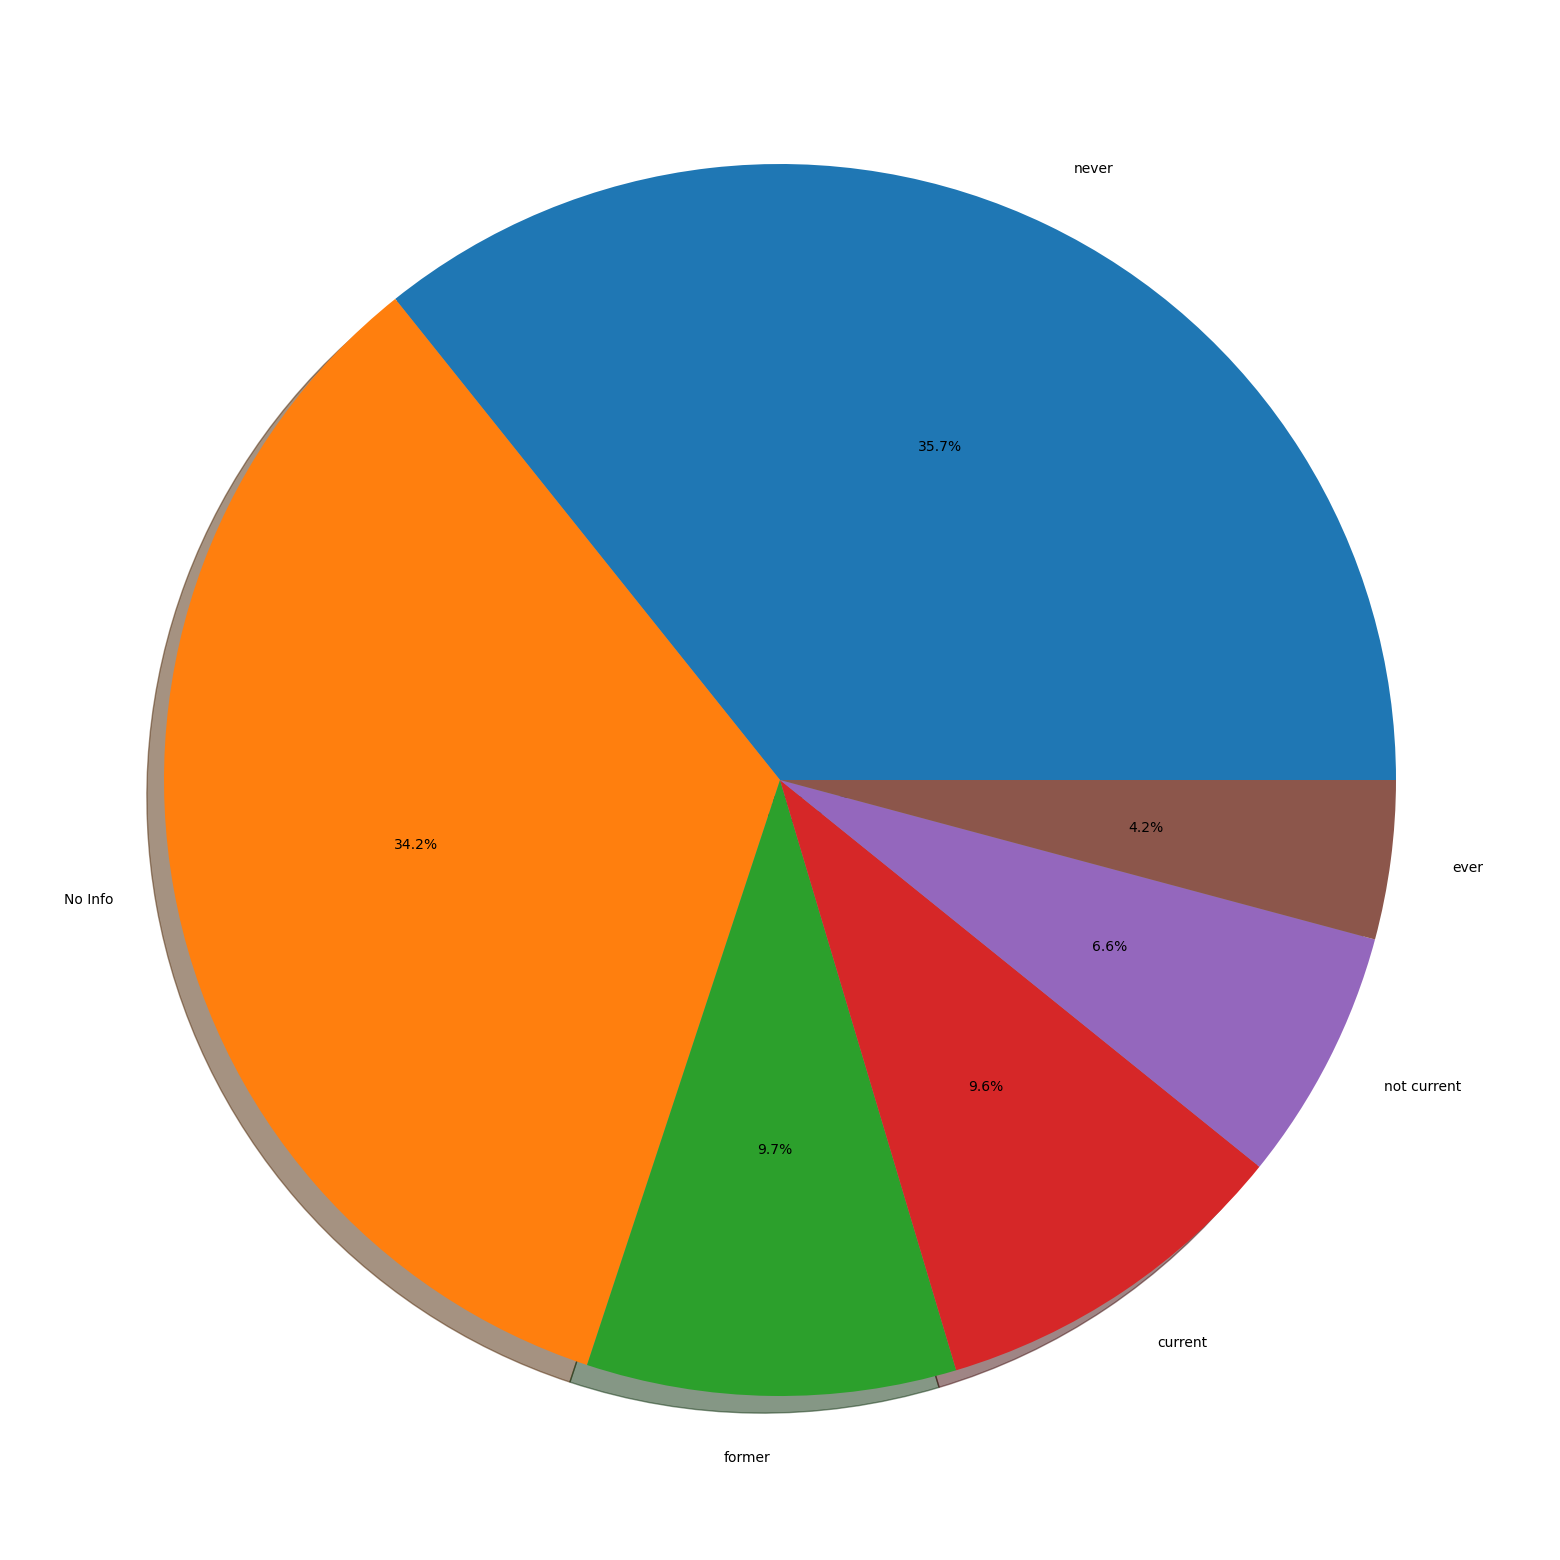

In [50]:
plt.figure(figsize = (20, 20))
label = show1.smoking_history.value_counts().index
label_count = show1.smoking_history.value_counts().values
plt.pie(data=show1, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

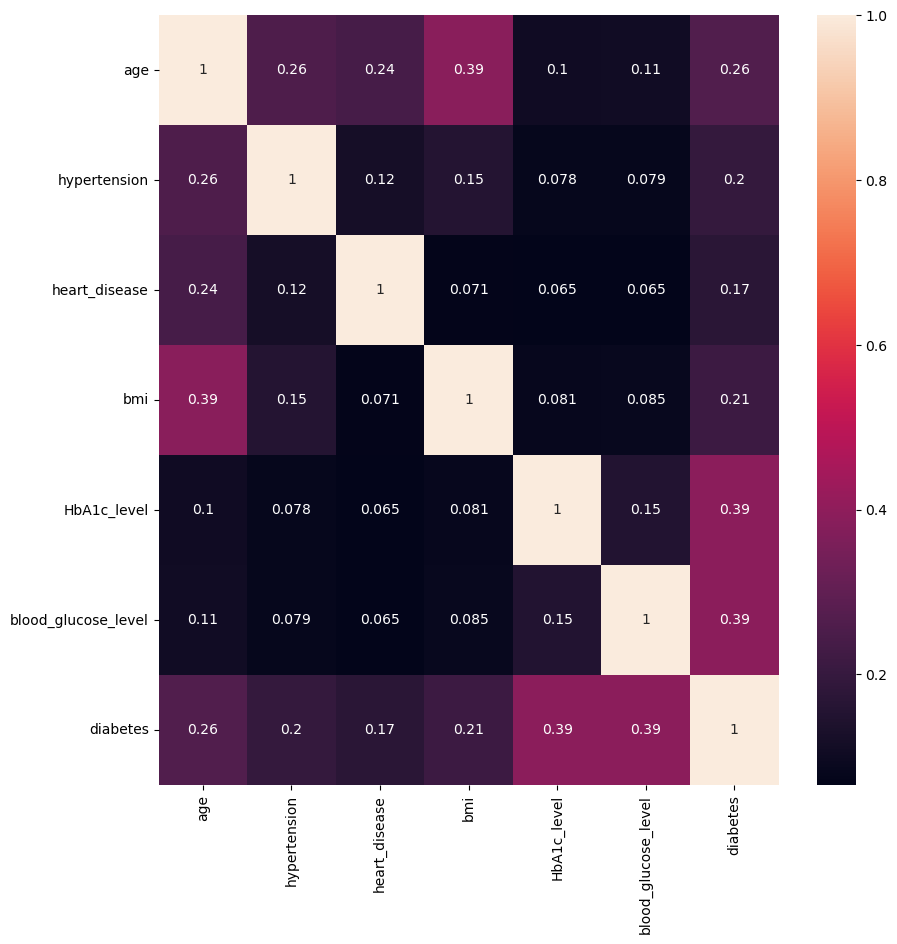

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(show1.corr(),annot=True)
plt.show()

In [52]:
show1['gender'].value_counts()

Female    55973
Male      39918
Other        18
Name: gender, dtype: int64

In [53]:
show1['gender'] = show1['gender'].map({'Female':0,'Male':1,'Other':2})

In [54]:
show1['smoking_history'].value_counts()

never          34275
No Info        32793
former          9292
current         9188
not current     6363
ever            3998
Name: smoking_history, dtype: int64

In [55]:
df1 = pd.get_dummies(show1['smoking_history'])

In [56]:
show1 = pd.concat([show1, df1], axis=1).reindex(show1.index)

In [57]:
show1.drop('smoking_history', axis=1, inplace=True)

In [58]:
show1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80.0,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158.0,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155.0,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155.0,0,0,1,0,0,0,0


# Machine Learning Model Part :

# Preprocessing

In [59]:
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif

In [60]:
X = show1.drop(columns='diabetes',axis=1)
y=show1['diabetes']

In [61]:
FS=SelectPercentile(score_func = chi2 , percentile=70)
X=FS.fit_transform(X,y)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest [Classifier]

In [65]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300,max_depth=5,random_state=2023)
RF.fit(X_train,y_train)
#y_pred=RF.predict(X_test)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=2023)

In [66]:
Score=RF.score(X_train,y_train)
print("Train score : ",Score*100,"%")

Train score :  97.07143508803941 %


In [67]:
y_pred=RF.predict(X_test)
Score1=accuracy_score(y_test,y_pred)
print("Test score : ",Score1*100,"%")

Test score :  97.08059639245126 %


In [68]:
y_pred[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [69]:
np.array(y_test[:20])

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

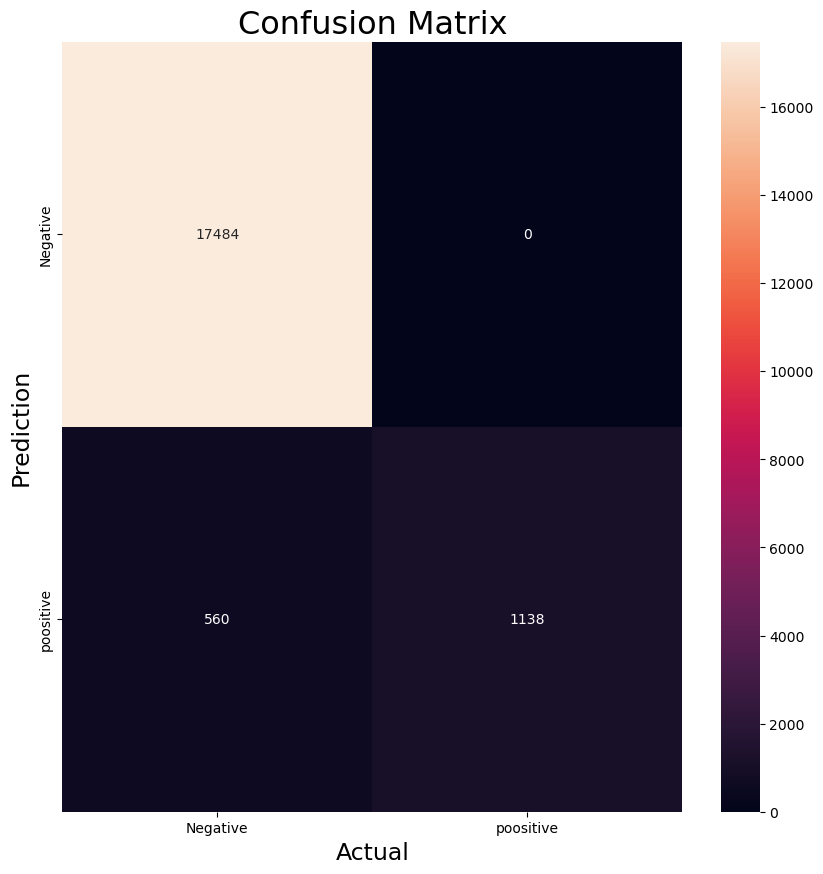

In [70]:
y_test1=np.array(y_test)
y_pred_rf=np.array(y_pred)

plt.figure(figsize = (10,10))
CM=confusion_matrix(y_test1,y_pred_rf)
labels = ["Negative","poositive"]
sns.heatmap(CM,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [71]:
Report=classification_report(y_test, y_pred,output_dict=True)
df = pd.DataFrame(Report).transpose()
df

,precision,recall,f1-score,support
0,0.968965,1.000000,0.984238,17484.000000
1,1.000000,0.670200,0.802539,1698.000000
accuracy,0.970806,0.970806,0.970806,0.970806
macro avg,0.984482,0.835100,0.893388,19182.000000
weighted avg,0.971712,0.970806,0.968154,19182.000000


# Support Vector Machine Model [SVC]

In [72]:
from sklearn.svm import SVC

In [73]:
svc_model=SVC(C=1,gamma='scale',random_state=2023)

svc_model.fit(X_train,y_train)

SVC(C=1, random_state=2023)

In [74]:
y_pred1=svc_model.predict(X_test)

In [75]:
Score1=accuracy_score(y_test,y_pred1)
print("Test score : ",Score1*100,"%")

Test score :  96.18913564800333 %


In [76]:
y_pred1[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [77]:
np.array(y_test[:20])

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

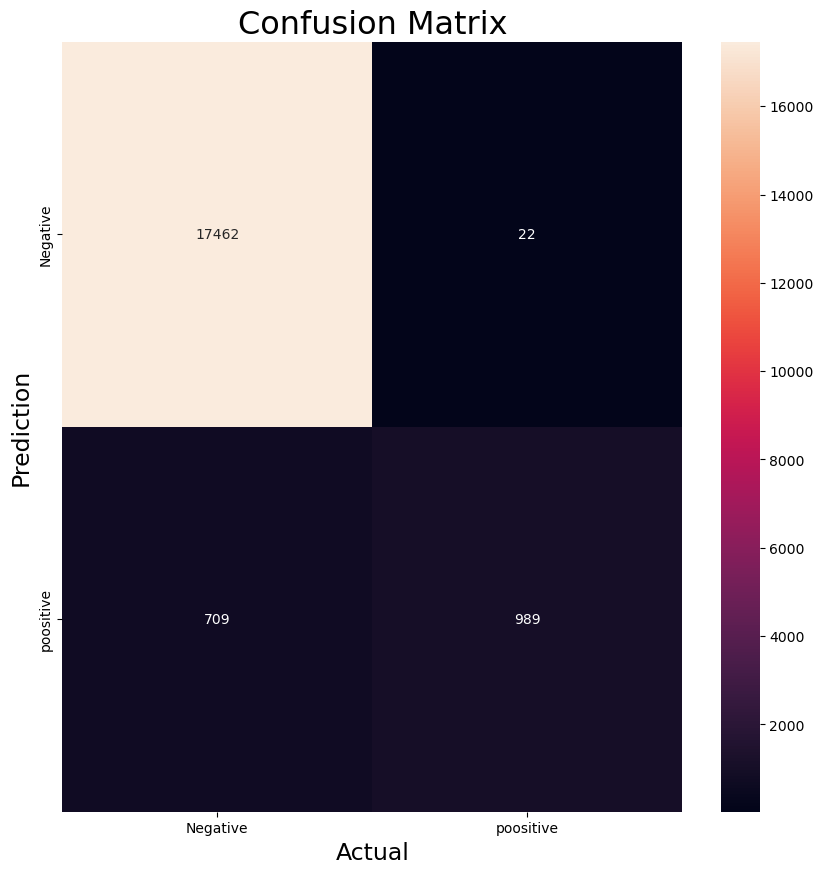

In [78]:
y_test1=np.array(y_test)
y_pred_svm=np.array(y_pred1)

plt.figure(figsize = (10,10))
CM2=confusion_matrix(y_test1,y_pred_svm)
labels = ["Negative","poositive"]
sns.heatmap(CM2,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [79]:
Report1=classification_report(y_test, y_pred1,output_dict=True)
df1 = pd.DataFrame(Report1).transpose()
df1

,precision,recall,f1-score,support
0,0.960982,0.998742,0.979498,17484.000000
1,0.978239,0.582450,0.730159,1698.000000
accuracy,0.961891,0.961891,0.961891,0.961891
macro avg,0.969611,0.790596,0.854828,19182.000000
weighted avg,0.962509,0.961891,0.957426,19182.000000


# Logistic Regression

In [80]:
LOR=LogisticRegression(random_state=2023)
LOR.fit(X_train,y_train)

LogisticRegression(random_state=2023)

In [81]:
y_pred2=svc_model.predict(X_test)

In [82]:
Score2=accuracy_score(y_test,y_pred2)
print("Test score : ",Score2*100,"%")

Test score :  96.18913564800333 %


In [83]:
y_pred2[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [84]:
np.array(y_test[:20])

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

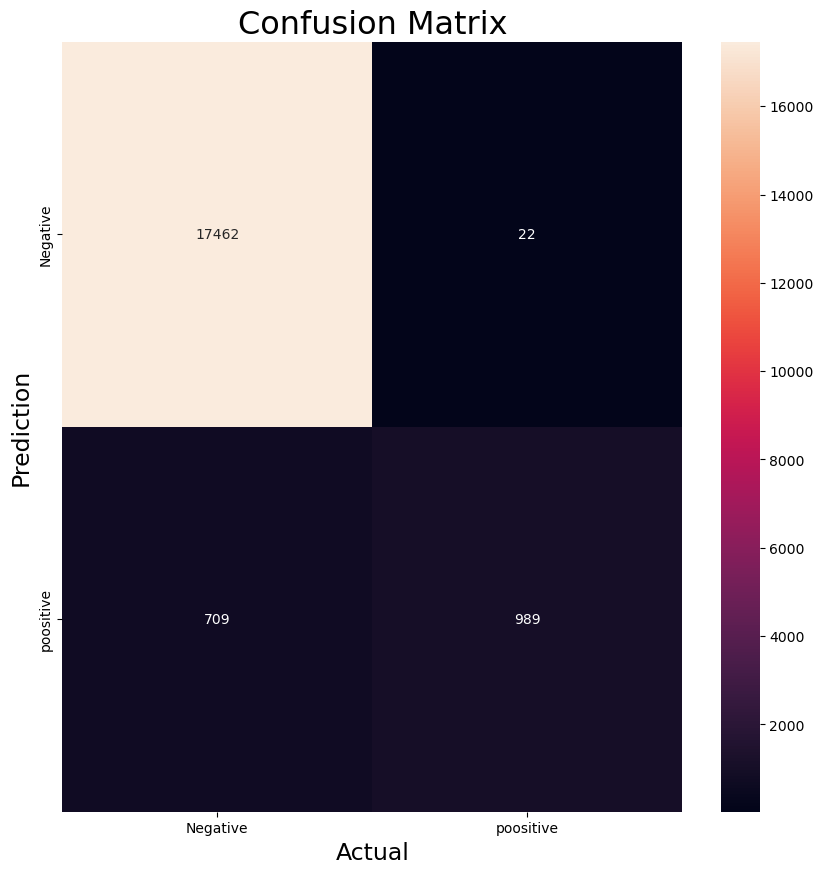

In [85]:
y_test1=np.array(y_test)
y_pred_log=np.array(y_pred2)

plt.figure(figsize = (10,10))
CM1=confusion_matrix(y_test1,y_pred_log)
labels = ["Negative","poositive"]
sns.heatmap(CM1,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [86]:
Report2=classification_report(y_test, y_pred2,output_dict=True)
df2 = pd.DataFrame(Report2).transpose()
df2

,precision,recall,f1-score,support
0,0.960982,0.998742,0.979498,17484.000000
1,0.978239,0.582450,0.730159,1698.000000
accuracy,0.961891,0.961891,0.961891,0.961891
macro avg,0.969611,0.790596,0.854828,19182.000000
weighted avg,0.962509,0.961891,0.957426,19182.000000
